In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import gmaps
import time
from datetime import datetime

#import the api key
from config import weather_api_key
from config import g_key

In [2]:
#create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities = []

#identify the nearest city for each latitude and longitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

625

In [5]:
#starting url for weather map api call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puro
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | te anau
Processing Record 5 of Set 1 | hasaki
Processing Record 6 of Set 1 | luderitz
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | along
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | goundam
Processing Record 11 of Set 1 | marawi
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | provideniya
Processing Record 14 of Set 1 | port macquarie
Processing Record 15 of Set 1 | ankang
Processing Record 16 of Set 1 | erzin
Processing Record 17 of Set 1 | terrace
Processing Record 18 of Set 1 | san andres
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | balkhash
Processing Record 21 of Set 1 | el alto
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | bassila
Processing 

Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | prince albert
Processing Record 40 of Set 4 | rovaniemi
Processing Record 41 of Set 4 | troyes
Processing Record 42 of Set 4 | nara
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | hirara
Processing Record 45 of Set 4 | thinadhoo
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | fort smith
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | ca mau
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | pitimbu
Processing Record 4 of Set 5 | pisco
Processing Record 5 of Set 5 | skalnyy
City not found. Skipping...
Processing Record 6 of Set 5 | puerto escondido
Processing Record 7 of Set 5 | katsuura
Processing Record 8 of Set 5 | sao raimundo nonato
Processing Rec

Processing Record 29 of Set 8 | carnarvon
Processing Record 30 of Set 8 | pachino
Processing Record 31 of Set 8 | pravda
Processing Record 32 of Set 8 | tunduru
City not found. Skipping...
Processing Record 33 of Set 8 | fortuna
Processing Record 34 of Set 8 | abu samrah
Processing Record 35 of Set 8 | guimar
Processing Record 36 of Set 8 | pinega
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | ayagoz
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | dauphin
Processing Record 41 of Set 8 | malindi
Processing Record 42 of Set 8 | rakkestad
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | novoilinsk
Processing Record 45 of Set 8 | atyashevo
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | amparafaravola
Processing Record 48 of Set 8 | koraput
Processing Record 49 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 8 | lityn
Processing Record 1 of Set 9 | roebourne


Processing Record 20 of Set 12 | tazovskiy
Processing Record 21 of Set 12 | rio gallegos
Processing Record 22 of Set 12 | sarkand
Processing Record 23 of Set 12 | namangan
Processing Record 24 of Set 12 | touros
Processing Record 25 of Set 12 | donskoy
Processing Record 26 of Set 12 | bay roberts
Processing Record 27 of Set 12 | porto novo
Processing Record 28 of Set 12 | metro
Processing Record 29 of Set 12 | hobyo
Processing Record 30 of Set 12 | carquefou
Processing Record 31 of Set 12 | port augusta
Processing Record 32 of Set 12 | cosala
Processing Record 33 of Set 12 | zhuhai
Processing Record 34 of Set 12 | ust-maya
Processing Record 35 of Set 12 | iqaluit
Processing Record 36 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 12 | key west
Processing Record 38 of Set 12 | olavarria
Processing Record 39 of Set 12 | floriano
Processing Record 40 of Set 12 | ishigaki
Processing Record 41 of Set 12 | caravelas
Processing Record 42 of Set 12 | sire
Proc

In [8]:
#convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puro,12.4841,123.3827,78.12,83,99,0.78,PH,2021-11-18 22:02:37
1,Kapaa,22.0752,-159.3190,82.18,70,18,1.01,US,2021-11-18 21:59:20
2,Longyearbyen,78.2186,15.6401,21.04,73,40,25.32,SJ,2021-11-18 21:56:55
3,Te Anau,-45.4167,167.7167,53.82,72,72,8.28,NZ,2021-11-18 22:02:37
4,Hasaki,35.7333,140.8333,45.00,80,85,5.08,JP,2021-11-18 22:02:38
5,Luderitz,-26.6481,15.1594,60.51,65,0,23.60,NA,2021-11-18 21:56:59
6,Chuy,-33.6971,-53.4616,59.00,58,0,7.29,UY,2021-11-18 22:01:38
7,Along,28.1667,94.7667,54.36,72,4,1.59,IN,2021-11-18 22:02:38
8,Busselton,-33.6500,115.3333,48.09,82,0,11.77,AU,2021-11-18 21:56:52
9,Goundam,16.4145,-3.6708,81.16,18,31,10.29,ML,2021-11-18 22:02:38


In [9]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

correct_city_data = city_data_df[new_column_order]

correct_city_data

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puro,PH,2021-11-18 22:02:37,12.4841,123.3827,78.12,83,99,0.78
1,Kapaa,US,2021-11-18 21:59:20,22.0752,-159.3190,82.18,70,18,1.01
2,Longyearbyen,SJ,2021-11-18 21:56:55,78.2186,15.6401,21.04,73,40,25.32
3,Te Anau,NZ,2021-11-18 22:02:37,-45.4167,167.7167,53.82,72,72,8.28
4,Hasaki,JP,2021-11-18 22:02:38,35.7333,140.8333,45.00,80,85,5.08
...,...,...,...,...,...,...,...,...,...
580,Albemarle,US,2021-11-18 22:16:41,35.3501,-80.2001,73.47,56,75,10.36
581,Komsomolskiy,UZ,2021-11-18 22:16:41,40.4272,71.7189,27.82,74,72,4.61
582,Palo Alto,US,2021-11-18 22:16:42,37.4419,-122.1430,67.06,71,75,3.00
583,College Place,US,2021-11-18 22:16:42,46.0493,-118.3883,51.04,93,90,9.22


In [10]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the city_data into a csv
correct_city_data.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = correct_city_data["Lat"]
max_temps = correct_city_data["Max Temp"]
humidity = correct_city_data["Humidity"]
cloudiness = correct_city_data["Cloudiness"]
wind_speed = correct_city_data["Wind Speed"]

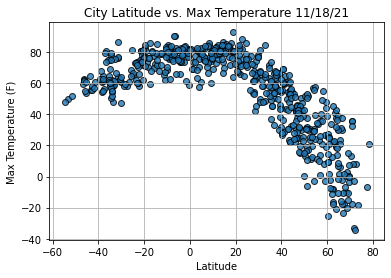

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

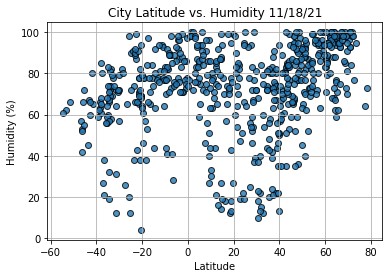

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

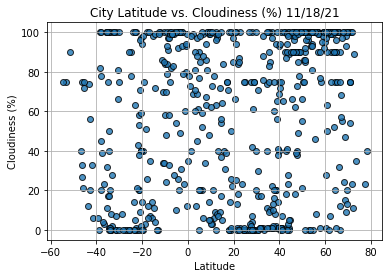

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

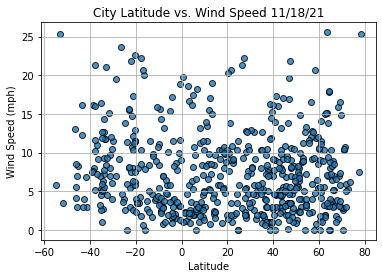

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = correct_city_data.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = correct_city_data.loc[(city_data_df["Lat"] < 0)]

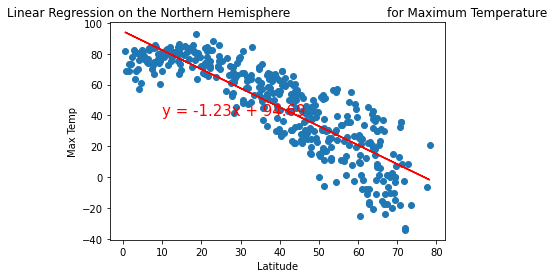

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

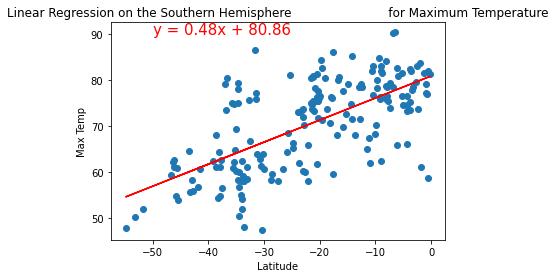

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

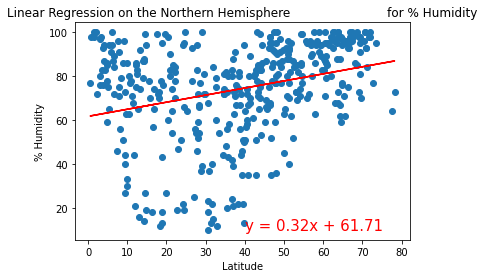

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

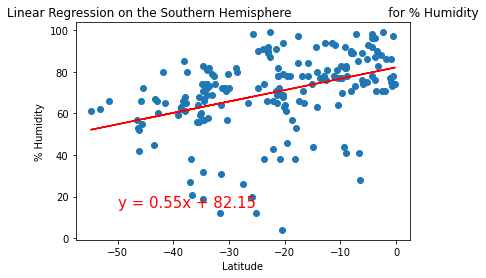

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

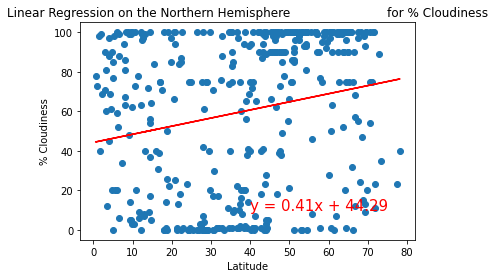

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

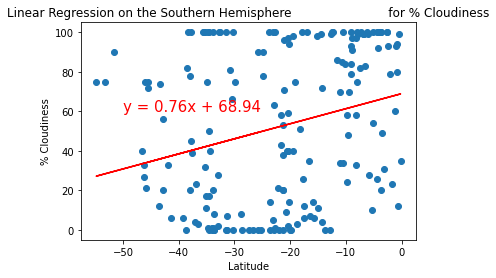

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

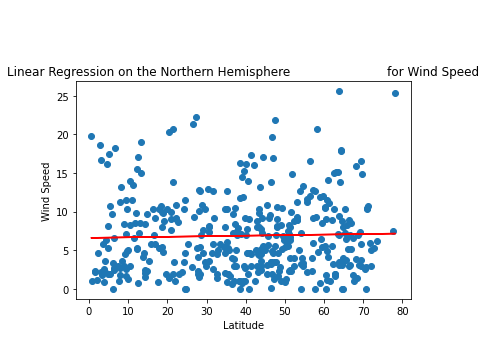

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

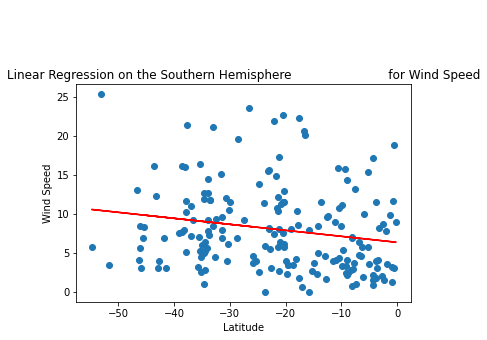

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 

## 